# Лабораторная работа №2. Критерии согласия и однородности выборок

> Вариант № 1

**Распределения**:

X ~ R(1,2) (объём выборки $n_x$ &mdash; 100)

Y ~ R(-1, 1) (объём выборки $n_y$ &mdash; 100)

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Немного магии для того, чтобы рисунки стали больше
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 22})

# Вспомогательные классы и функции, определённые тут же (см. репозиторий)
# https://github.com/BobNobrain/matstat-labs/tree/master/s
from s import Sample
from s.utils import table

## Задание переменных и генерация выборок

In [82]:
nx = 100
ny = 100

X = stats.norm(1,2)
Y = stats.uniform(-1,2)


# Пример использования класса Sample для получения выборки из заданного распределения
x = Sample.from_distribution("x", X, count=nx)
y = Sample.from_distribution("y", Y, count=ny)
# Альтернатива: X.rvs(size=nx) - массив случайных чисел из заданного распределения

# Вспомогательный метод класса s.Sample
x.describe()
y.describe()

# Отрисовка таблицы: массив заголовочных ячеек, массив строк таблицы
table(
    ['Распределение', 'Параметры', '$m$', '$\\sigma^2$'],
    [
        ['N', 'm=1, s=4', X.mean(), round(X.var(), 4)],
        ['R', 'a=-1, b=1', Y.mean(), round(Y.var(), 4)]
    ]
)

Sample x: m=0.8235127727485788, s=1.9926163606762946, s^2=3.970519960834841
Sample y: m=-0.03787105763780438, s=0.6175493404896573, s^2=0.38136718793921065


Распределение,Параметры,$m$,$\sigma^2$
N,"m=1, s=4",1.0,4.0
R,"a=-1, b=1",0.0,0.3333


## 1. Исходные данные

In [112]:
print('Характеристики СВ X:')

table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    [['N', '1,2', '1', '4']]
)

print('Характеристики выборки x')
table(
    ['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
    [[str(x.mean()), str(x.var()) , str(x.s())]]
)

Характеристики СВ X:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$
N,"1,2",1,4


Характеристики выборки x


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"
0.8235127727485788,3.930814761226492,1.9926163606762946


## 2. Визуальное представление выборки

Гистограммы частот для nbins {5, 10, 15, 8
}:

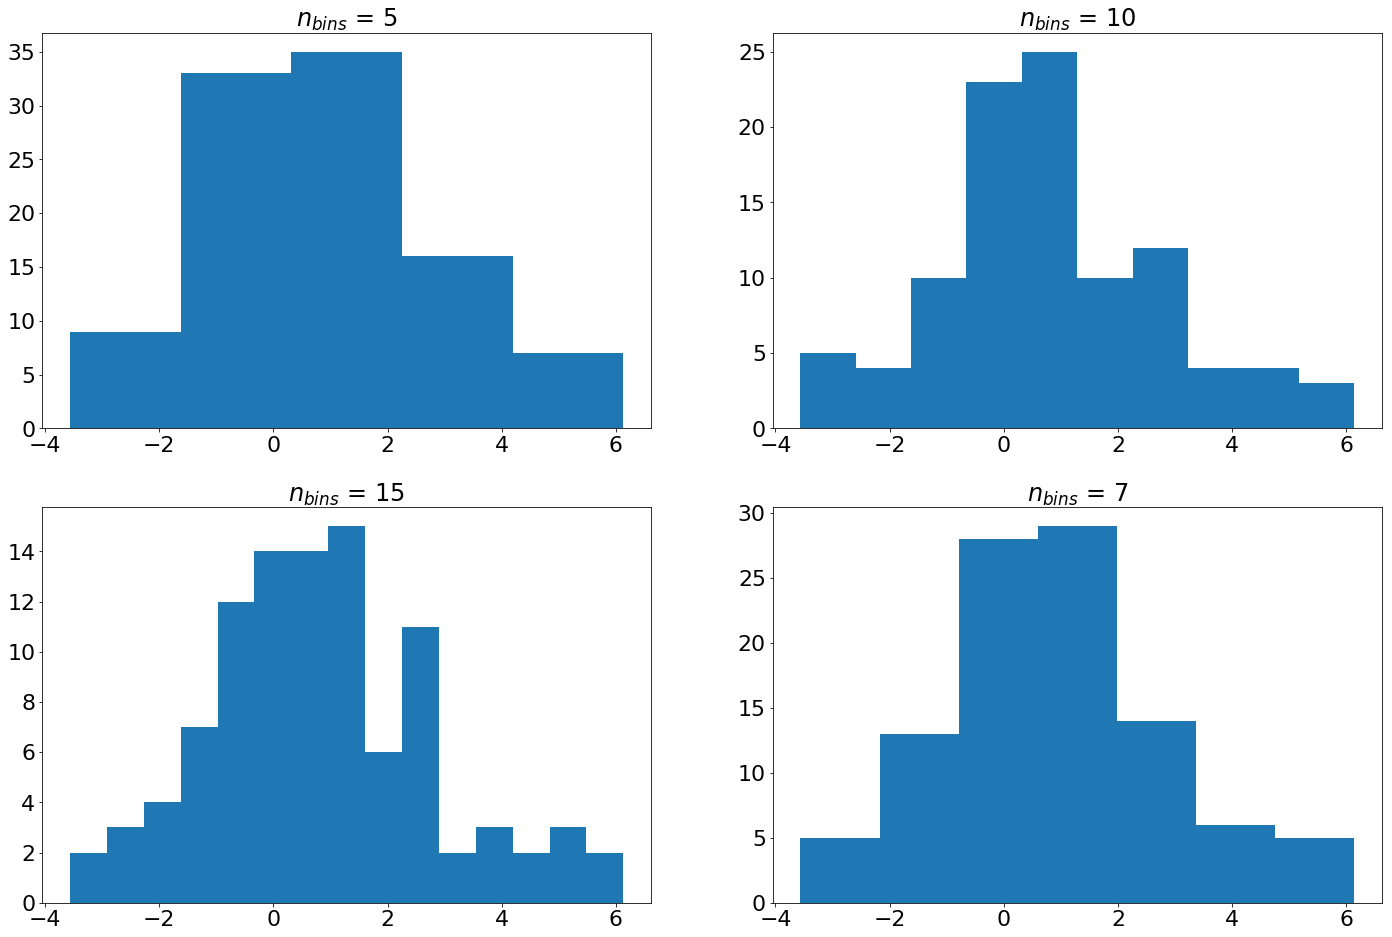

In [84]:
n_my = int(np.round(1+1.3*np.log(nx))) # TODO: выбрать число
fig, axs = plt.subplots(2,2)

n_bins_values = [5, 10, 15, n_my]

for i in range(4):
    n_bins = n_bins_values[i]
    picture = axs[i // 2][i % 2]
    picture.hist(x.data(), bins=n_bins)
    picture.set_title('$n_{bins}$ = {}'.format(n_bins, bins='{bins}'), fontsize=24)

## 3. Критерий хи-квадрат

*а)* Статистическая гипотеза $H_0: X \sim N$

In [87]:
from s import Pierson1SampledHyp

alpha = 0.01
my_n = n_my

proposed_dist1 = stats.norm(X.mean(),X.std())

def table_row(n, prop_dist, par_n):
    start = -4.
    end = 6.
    step = (end - start) / n
    
    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=par_n
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=prop_dist, sample=x, alpha=alpha)
    decision = 'H1' if passed else 'H0'
    if (p_v<alpha):
        decision='H1'
        er = "нет ошибки"
    else:
         decision='H0'
         er = "есть ошибка"
    return [n, round(criterion_v, 4), round(p_v, 4), decision, er]

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5, proposed_dist1, 2),
        table_row(10, proposed_dist1, 2),
        table_row(15, proposed_dist1, 2),
        table_row(n_my, proposed_dist1, 2)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,5.7341,0.0569,H0,есть ошибка
10,7.1524,0.4132,H0,есть ошибка
15,25.785,0.0182,H0,есть ошибка
7,5.6051,0.2306,H0,есть ошибка


---

*б)* Статистическая гипотеза $H_0: X \sim R$

In [95]:
alph = 0.01
my_n = n_my

proposed_dist2 = stats.uniform(-2.46, 6)  # m=(b+a)/2   d=(b-a)^2/12


def table_row1(n, prop_dist, par_n):
    start = -1.8
    end = 3.8
    step = (end - start) / n
    
    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=par_n
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=prop_dist, sample=x, alpha=alph)
    decision = 'H0' if passed else 'H1'
    if (decision == 'H0'):
        er = "нет ошибки"
    else:
        er = "есть ошибка"
    return [n, round(criterion_v, 4), round(p_v, 4), decision, er]

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row1(5, proposed_dist2, 2),
        table_row1(10, proposed_dist2, 2),
        table_row1(15, proposed_dist2, 2),
        table_row1(my_n, proposed_dist2, 2)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,20.1725,0.0,H1,есть ошибка
10,21.1407,0.0036,H1,есть ошибка
15,28.4985,0.0047,H1,есть ошибка
7,18.6596,0.0009,H1,есть ошибка


---

*в)* Статистическая гипотеза $H_0: X \sim \chi^2(5)$

In [100]:
alpha = 0.01
my_n = n_my

proposed_dist3 = stats.chi2(5)
def table_row(n, prop_dist, par_n):
    start = 1.
    end = 6.
    step = (end - start) / n
    
    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=par_n
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=prop_dist, sample=x, alpha=alpha)
    decision = 'H1' if passed else 'H0'
    if (p_v<alpha):
        decision='H1'
        er = "нет ошибки"
    else:
         decision='H0'
         er = "есть ошибка"
    return [n, round(criterion_v, 4), round(p_v, 4), decision, er]
table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5, proposed_dist3, 1),
        table_row(10, proposed_dist3, 1),
        table_row(15, proposed_dist3, 1),
        table_row(my_n, proposed_dist3, 1)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,24.5737,0.0,H1,нет ошибки
10,25.9978,0.0011,H1,нет ошибки
15,29.0803,0.0064,H1,нет ошибки
7,23.6825,0.0002,H1,нет ошибки


## 4. Критерий Колмогорова

In [101]:
alpha = 0.01

z099 = 1.63 #квантиль распределния Колмогорова
def table_row_ks(dis, sq): # dis - string
    cr_p = stats.kstest(x.data(), dis, sq, alternative = 'two-sided') #args=(.., ..)
    decision = "H0"
    er = "есть ошибка"
    print(cr_p)
    if (cr_p[0] > z099):
        decision = "H1"
        er = "нет ошибки"
    return [round(cr_p[0], 4), round(cr_p[1], 4), decision, er]


    return [round(cr_p[0], 4), round(cr_p[1], 4), decision, er]

table(
    [
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['$X \\sim N(m, \\sigma)$'] + table_row_ks("norm", [X.mean(), X.var()]),
        ['$X \\sim R$'] + table_row_ks("uniform", [-2.46, 6]),
        ['$X \\sim \\chi^2(5)$'] + table_row_ks("chi2", [5])
    ]
)

KstestResult(statistic=0.20114584640813538, pvalue=0.0005052777535710096)
KstestResult(statistic=0.12012507572637177, pvalue=0.1026865252884146)
KstestResult(statistic=0.616183218864153, pvalue=0.0)


Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
"$X \sim N(m, \sigma)$",0.2011,0.0005,H0,есть ошибка
$X \sim R$,0.1201,0.1027,H0,нет ошибки
$X \sim \chi^2(5)$,0.6162,0.0,H0,есть ошибка


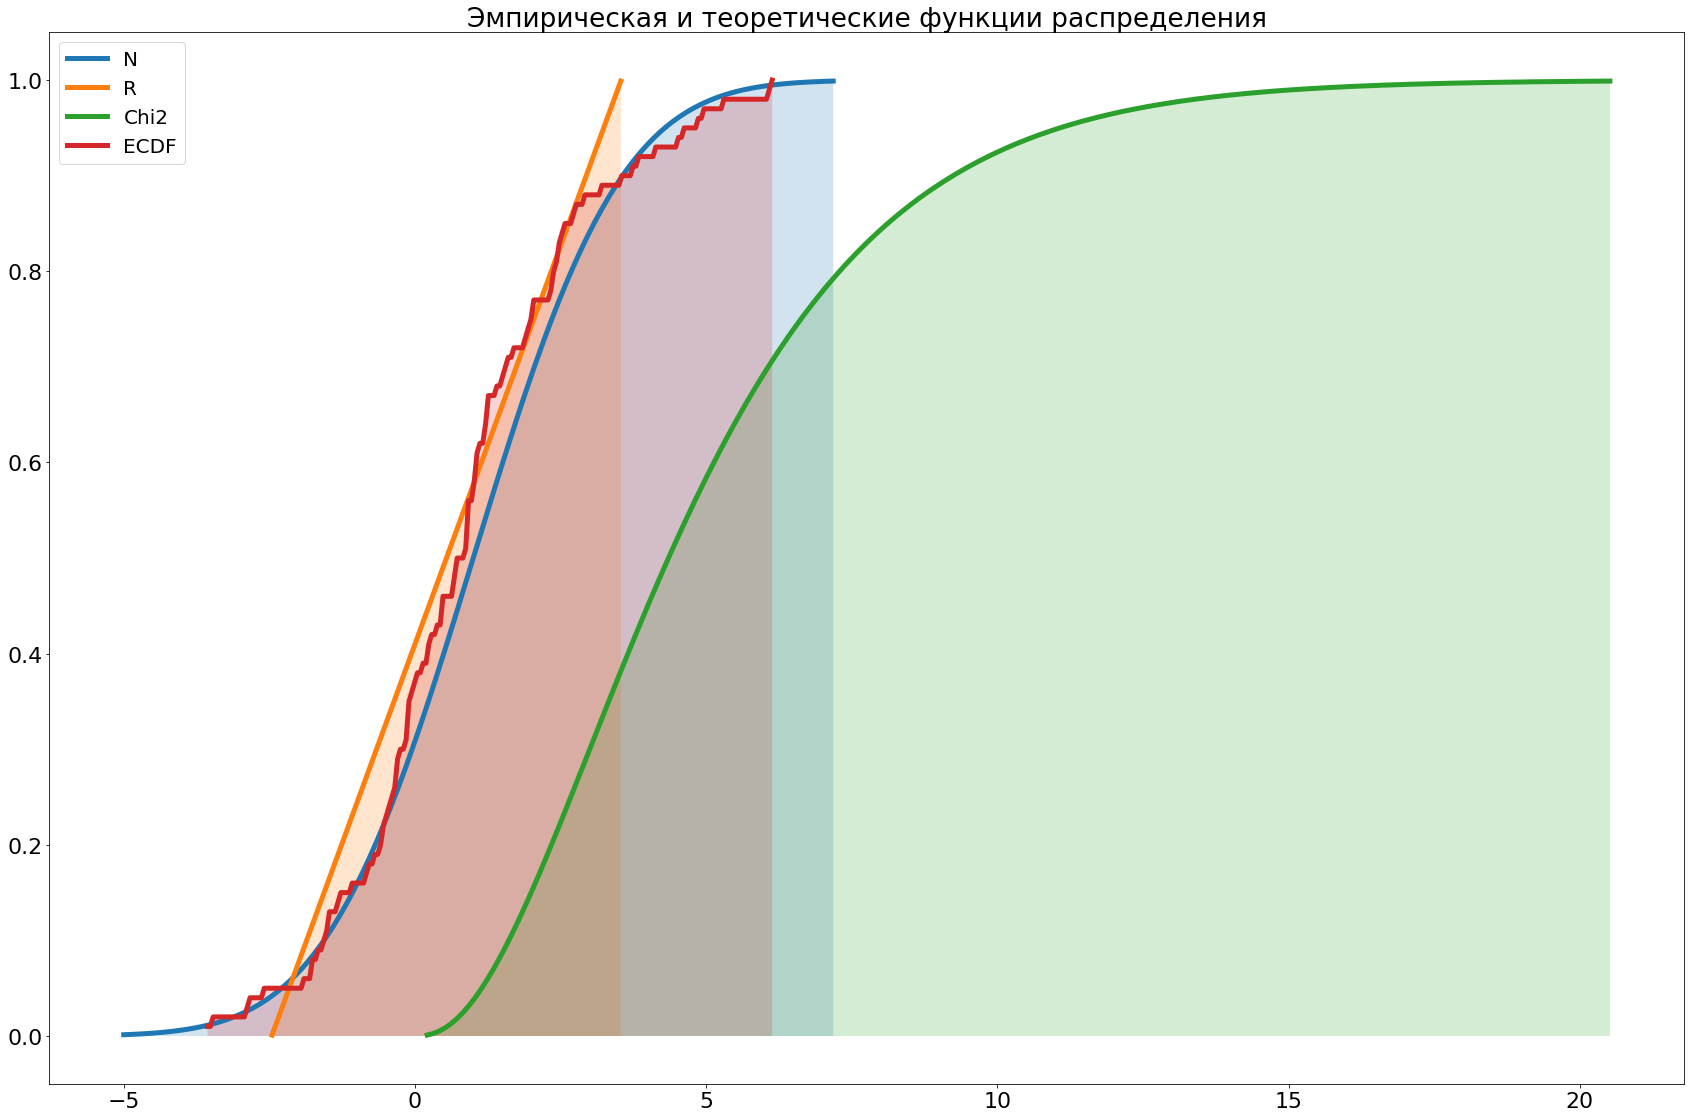

In [102]:
h0_distributions = [
    ('N', proposed_dist1),
    ('R', proposed_dist2),
    ('Chi2', proposed_dist3)
]


fig, ax = plt.subplots()
ax.set_title('Эмпирическая и теоретические функции распределения')

for name, dist in h0_distributions:
    domain = np.linspace(
        max(-5, dist.ppf(0.001)),
        min(30, dist.ppf(0.999)),
        200
    )
    values = dist.cdf(domain)
    ax.plot(domain, values, lw=5, label=name)
    ax.fill_between(domain, 0, values, alpha=.2)
    
ecdf = ECDF(x.data())
domain = np.linspace(x.min(), x.max(), x.n() * 2)
values = ecdf(domain)
ax.plot(domain, values, lw=5, label='ECDF')
ax.fill_between(domain, 0, values, alpha=.2)

ax.legend(prop={'size': 20})
    
fig.tight_layout()
plt.show()

# 5. Двухвыборочные критерии

In [104]:
print('Характеристики СВ Y:')
table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    [['R', "-1, 1", "0", str((2)**2/12.)]]
)

print('Характеристики выборки y')
table(
    ['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
    [[str(y.mean()), str(y.var()) , str(y.s())]]
)


Характеристики СВ Y:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$
R,"-1, 1",0,0.3333333333333333


Характеристики выборки y


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"
-0.03787105763780438,0.37755351605981846,0.6175493404896573


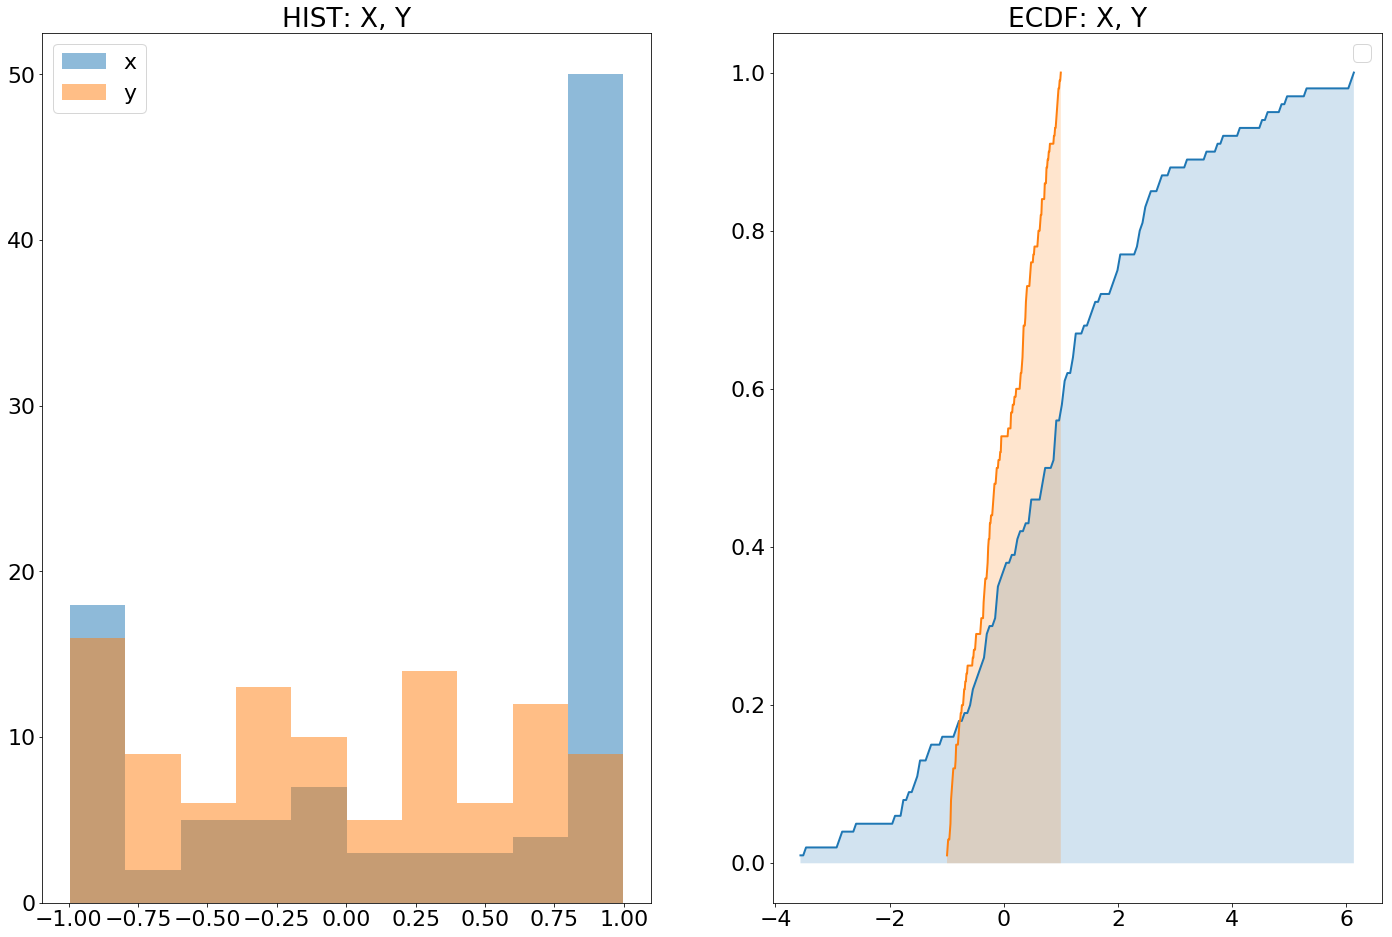

In [105]:
fig, ax = plt.subplots(1, 2)

left_plot = ax[0]
right_plot = ax[1]

min_val = max(x.min(), y.min())
max_val = min(x.max(), y.max())
clipped_x = np.clip(x.data(), min_val, max_val)
clipped_y = np.clip(y.data(), min_val, max_val)

left_plot.set_title('HIST: X, Y')
left_plot.hist(clipped_x, bins=10, label='x', alpha=.5)
left_plot.hist(clipped_y, bins=10, label='y', alpha=.5)
left_plot.legend()


right_plot.set_title('ECDF: X, Y');
ecdfX = ECDF(x.data())
ecdfY = ECDF(y.data())
domainX = np.linspace(x.min(), x.max(), x.n() * 2)
domainY = np.linspace(y.min(), y.max(), y.n() * 2)
valuesX = ecdfX(domainX)
valuesY = ecdfY(domainY)
right_plot.plot(domainX, valuesX, lw=2, label='ECDF')
right_plot.fill_between(domainX, 0, valuesX, alpha=.2)
right_plot.plot(domainY, valuesY, lw=2, label='ECDF')
right_plot.fill_between(domainY, 0, valuesY, alpha=.2)
right_plot.legend("")


# TODO: ECDF

In [110]:
from s import Pierson2SampledHyp
alpha = 0.05

def left_p_value(dist, criterion_value):
    return dist.cdf(criterion_value)

def two_sided_p_value(dist, criterion_value):
    left_p = left_p_value(dist, criterion_value)
    return 2 * min(left_p, 1 - left_p)

def chi_2():
    start = -3
    end = 5
    step = (end - start) / my_n
    
    h0 = Pierson2SampledHyp(
        bins=np.arange(start, end + step, step)
    )
    criterion_v, critical_values, p_v, passed = h0.full_test(x, y, alpha)
    if passed :
        decision = 'H0' 
        er = 'есть ошибка'
    else :
        decision = 'H1'
        er = 'нет ошибки'    
    return [round(criterion_v, 4), round(p_v, 4), decision, er]

def KS ():
    s_p = stats.ks_2samp(x.data(), y.data())
    if (s_p[0] < z099) :
        decision = 'H0' 
        er = 'есть ошибка'
    else :
        decision = 'H1'
        er = 'нет ошибки'
    return [round(s_p[0], 4), round(s_p[1], 4), decision, er]

def ST ():
    K = ((x.data()-y.data())>0).sum()
    Z = (K-nx/2)/(np.sqrt(nx)/2)
    if (abs(Z) < stats.norm(0, 1).ppf(0.995)) :
        decision = 'H0' 
        er = 'есть ошибка'
    else :
        decision = 'H1'
        er = 'нет ошибки'
    return [round(Z, 4), round(two_sided_p_value(stats.norm, Z), 4), decision, er]

def U ():
    s_p = stats.mannwhitneyu(x.data(), y.data(), alternative = 'two-sided')
    cr = (s_p[0] - nx*ny/2)/np.sqrt(nx*ny*(nx+ny-1)/12)
    if (abs(cr) < stats.norm(0, 1).ppf(0.995)) :
        decision = 'H0' 
        er =  'есть ошибка'
    else :
        decision = 'H1'
        er = 'нет ошибки'
    return [round(cr, 4), round(s_p[1], 4), decision, er]
    

#stats.chi2(my_n-1).ppf(0.99)

table(
    [
        'Критерий',
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['Chi-squared', 'X~Y'] + chi_2(),
        ['KS-test', 'X~Y'] + KS(),
        ['Sign test', 'X~Y'] + ST(),
        ['U-test', 'X~Y'] + U()
    ]
)

Критерий,Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.05,Ошибка статистического решения
Chi-squared,X~Y,43.0513,0.0,H1,нет ошибки
KS-test,X~Y,0.44,0.0,H0,есть ошибка
Sign test,X~Y,3.2,0.0014,H1,нет ошибки
U-test,X~Y,3.9266,0.0001,H1,нет ошибки
